# LAB-1

### Author

- [Navaneeth Sivakumar](https://github.com/Sivakumar-Navaneeth)

### 1. read B/W image and display it

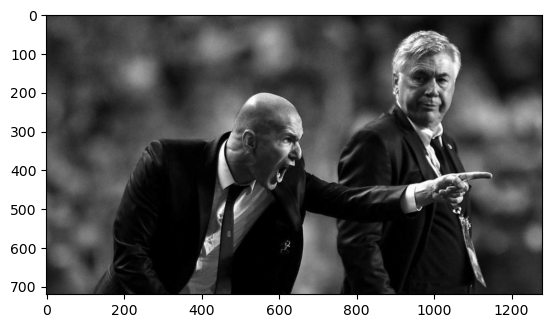

In [1]:
import cv2
import matplotlib.pyplot as plt

image_path = 'Data/zidane_gray.jpg' 
image = cv2.imread(image_path)

image_bw = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

plt.imshow(image_bw)
plt.show()


### 2. display black and white pixels seperatly

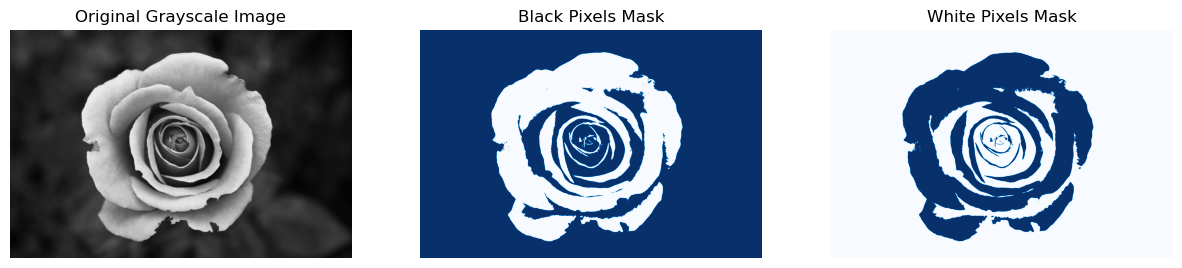

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = 'Data/flower.jpg'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

black_threshold = 125
white_threshold = 125

black_pixels = np.where(image > black_threshold, 0, 255).astype(np.uint8)
white_pixels = np.where(image < white_threshold, 0, 255).astype(np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Grayscale Image')
axs[0].axis('off')

axs[1].imshow(black_pixels, cmap='Blues')
axs[1].set_title('Black Pixels Mask')
axs[1].axis('off')

axs[2].imshow(white_pixels, cmap='Blues')
axs[2].set_title('White Pixels Mask')
axs[2].axis('off')

plt.show()


### 3. Read a colour image and display it

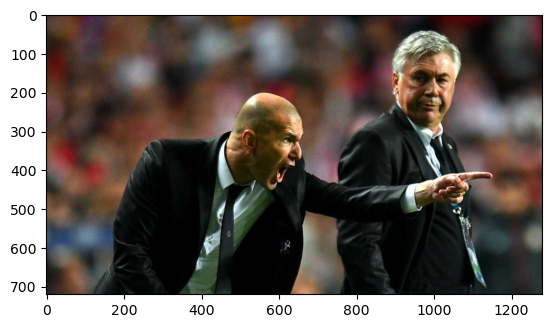

In [3]:
import cv2
import matplotlib.pyplot as plt

image_path = 'Data/zidane.jpg' 
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()


### 4. Segereate the colour image

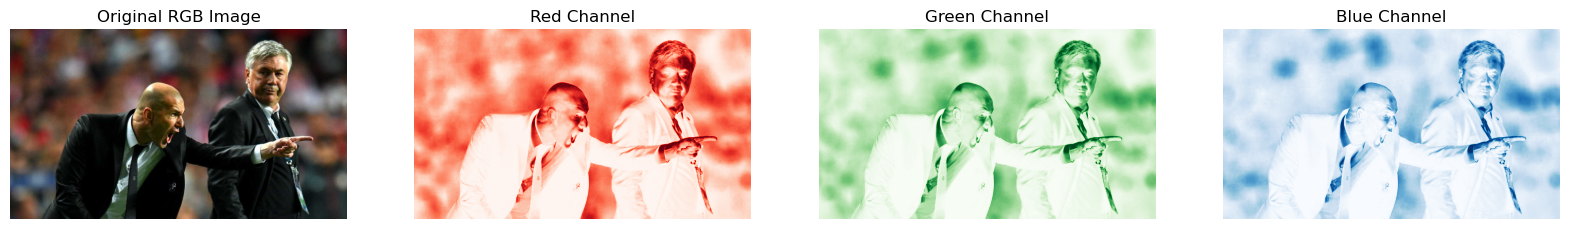

In [5]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

R, G, B = cv2.split(image_rgb)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(image_rgb)
axs[0].set_title('Original RGB Image')
axs[0].axis('off')

axs[1].imshow(R, cmap='Reds')
axs[1].set_title('Red Channel')
axs[1].axis('off')

axs[2].imshow(G, cmap='Greens')
axs[2].set_title('Green Channel')
axs[2].axis('off')

axs[3].imshow(B, cmap='Blues')
axs[3].set_title('Blue Channel')
axs[3].axis('off')

plt.show()


### 5. Convert RGB image into CMY

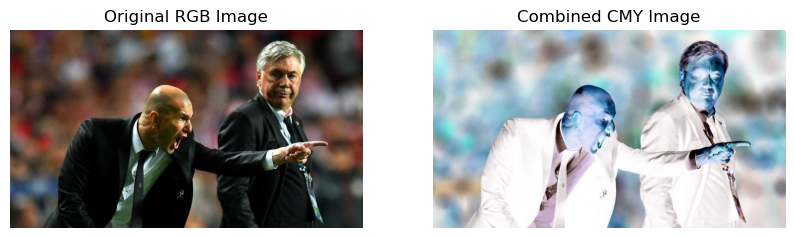

In [6]:
image_path = 'Data/zidane.jpg'  
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_rgb_normalized = image_rgb / 255.0

C = 1 - image_rgb_normalized[:, :, 0]  
M = 1 - image_rgb_normalized[:, :, 1]  
Y = 1 - image_rgb_normalized[:, :, 2]  

image_cmy = np.stack((C, M, Y), axis=-1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_rgb)
axs[0].set_title('Original RGB Image')
axs[0].axis('off')

axs[1].imshow(image_cmy)
axs[1].set_title('Combined CMY Image')
axs[1].axis('off')

plt.show()

### 6. Convert RGB image to HSI

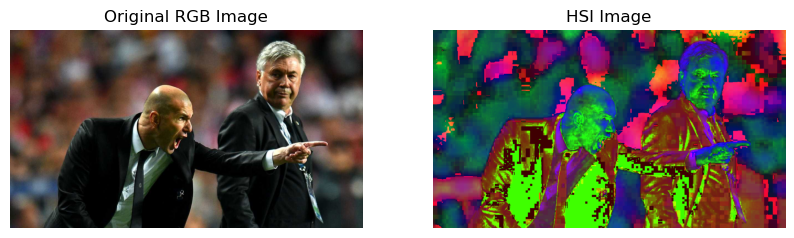

True

In [7]:
def rgb_to_hsi(image):
    # Normalize RGB values to the range [0, 1]
    image = image / 255.0
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    
    # Calculate Intensity
    I = (R + G + B) / 3.0
    
    # Calculate Saturation
    min_RGB = np.minimum(np.minimum(R, G), B)
    S = 1 - (3.0 / (R + G + B + 1e-6)) * min_RGB
    
    # Calculate Hue
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G)**2 + (R - B) * (G - B))
    theta = np.arccos(numerator / (denominator + 1e-6))
    
    H = np.zeros_like(theta)
    H[B <= G] = theta[B <= G]
    H[B > G] = 2 * np.pi - theta[B > G]
    
    # Normalize H to the range [0, 1]
    H = H / (2 * np.pi)
    
    # Stack the H, S, I channels to get the HSI image
    HSI = np.stack((H, S, I), axis=-1)
    
    return HSI

# Example usage
image = cv2.imread('Data/zidane.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsi_image = rgb_to_hsi(image_rgb)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_rgb)
axs[0].set_title('Original RGB Image')
axs[0].axis('off')

axs[1].imshow(hsi_image)
axs[1].set_title('HSI Image')
axs[1].axis('off')

plt.show()

hsi_image = (hsi_image * 255).astype(np.uint8)
cv2.imwrite("Data/zidane_hsi.jpg", hsi_image)


### 7. Convert HSI image to RGB

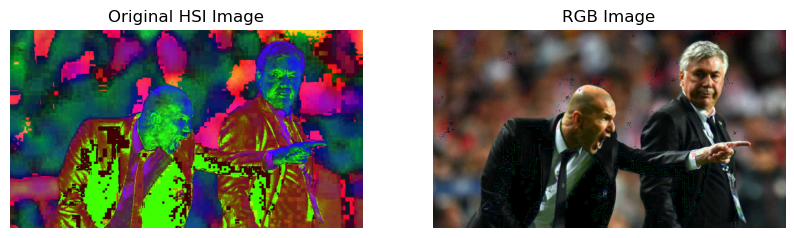

In [8]:
import numpy as np
import cv2

def hsi_to_rgb(hsi_image):
    H, S, I = hsi_image[:,:,0], hsi_image[:,:,1], hsi_image[:,:,2]
    H = H * 2 * np.pi  # Convert H from [0, 1] to [0, 2*pi]
    
    R = np.zeros_like(H)
    G = np.zeros_like(H)
    B = np.zeros_like(H)
    
    # RG sector (0 <= H < 2*pi/3)
    idx = (0 <= H) & (H < 2 * np.pi / 3)
    B[idx] = I[idx] * (1 - S[idx])
    R[idx] = I[idx] * (1 + S[idx] * np.cos(H[idx]) / np.cos(np.pi / 3 - H[idx]))
    G[idx] = 3 * I[idx] - (R[idx] + B[idx])
    
    # GB sector (2*pi/3 <= H < 4*pi/3)
    idx = (2 * np.pi / 3 <= H) & (H < 4 * np.pi / 3)
    H[idx] = H[idx] - 2 * np.pi / 3
    R[idx] = I[idx] * (1 - S[idx])
    G[idx] = I[idx] * (1 + S[idx] * np.cos(H[idx]) / np.cos(np.pi / 3 - H[idx]))
    B[idx] = 3 * I[idx] - (R[idx] + G[idx])
    
    # BR sector (4*pi/3 <= H < 2*pi)
    idx = (4 * np.pi / 3 <= H) & (H < 2 * np.pi)
    H[idx] = H[idx] - 4 * np.pi / 3
    G[idx] = I[idx] * (1 - S[idx])
    B[idx] = I[idx] * (1 + S[idx] * np.cos(H[idx]) / np.cos(np.pi / 3 - H[idx]))
    R[idx] = 3 * I[idx] - (G[idx] + B[idx])
    
    # Combine R, G, B channels
    rgb_image = np.stack((R, G, B), axis=-1)
    rgb_image = (rgb_image * 255).astype(np.uint8)
    
    return rgb_image

# Example usage
hsi_image = cv2.imread('Data/zidane_hsi.jpg')
hsi_image = hsi_image / 255.0  # Normalize to [0, 1]
rgb_image = hsi_to_rgb(hsi_image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(hsi_image)
axs[0].set_title('Original HSI Image')
axs[0].axis('off')

axs[1].imshow(rgb_image)
axs[1].set_title('RGB Image')
axs[1].axis('off')

plt.show()